In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Pokemon dataset.csv')

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
df.shape

(800, 13)

In [ ]:
#drop columns
#1) drop fun
#2) iloc

df = df.iloc[:,1:]

In [ ]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
#rename Type1 and Type2 cols

df.rename(columns={
    'Type 1':'Primary_type',
    'Type 2': 'Secondary_type'
}, inplace = True)

In [ ]:
df.head()

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
#Analysis
df.Primary_type.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Primary_type, dtype: int64

In [ ]:
df.Secondary_type.value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Secondary_type, dtype: int64

In [ ]:
df.Secondary_type = df.Secondary_type.fillna(value='Unknown')

In [ ]:
df.Secondary_type.value_counts()

Unknown     386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Secondary_type, dtype: int64

In [ ]:
grass_pok = df.loc[df.Primary_type=='Grass']

In [ ]:
grass_pok.head()

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False


In [ ]:
grass_pok.reset_index(inplace=True,drop=True)

In [ ]:
grass_pok

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
65,Chespin,Grass,Unknown,313,56,61,65,48,45,38,6,False
66,Quilladin,Grass,Unknown,405,61,78,95,56,58,57,6,False
67,Chesnaught,Grass,Fighting,530,88,107,122,74,75,64,6,False
68,Skiddo,Grass,Unknown,350,66,65,48,62,57,52,6,False


In [ ]:
grass_pok_poison = grass_pok[grass_pok.Secondary_type=='Poison']

In [ ]:
grass_pok_poison.head()

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False


In [ ]:
grass_pok_poison.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,414.066667,64.866667,70.533333,62.533333,87.133333,75.333333,53.666667,2.066667
std,102.019933,19.164203,20.476002,22.727789,22.481315,23.026899,21.083733,1.624221
min,280.000000,40.000000,30.000000,35.000000,50.000000,30.000000,15.000000,1.000000
25%,319.000000,50.000000,57.500000,47.000000,72.500000,65.000000,40.000000,1.000000
50%,400.000000,60.000000,70.000000,63.000000,85.000000,75.000000,55.000000,1.000000
75%,490.000000,77.500000,83.500000,70.000000,100.000000,85.000000,67.500000,3.500000
max,625.000000,114.000000,105.000000,123.000000,125.000000,120.000000,90.000000,5.000000


In [ ]:
grass_pok_poison_min_speed = grass_pok_poison.Speed.min()

In [ ]:
grass_pok_poison_max_speed = grass_pok_poison.Speed.max()

In [ ]:
grass_pok_poison_max_speed

90

In [ ]:
my_grass_pok = grass_pok_poison[grass_pok_poison.Speed==90]

In [ ]:
my_grass_pok

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
39,Roserade,Grass,Poison,515,60,70,65,125,105,90,4,False


In [ ]:
water_flying_pok = df.loc[(df.Primary_type=='Water')& (df.Secondary_type =='Flying')]

In [ ]:
water_flying_pok.head()

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
140,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
244,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
301,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
302,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
508,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False


In [ ]:
water_flying_pok.reset_index(inplace=True,drop=True)

In [ ]:
water_flying_pok.head()

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
1,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
2,Wingull,Water,Flying,270,40,30,30,55,30,85,3,False
3,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
4,Mantyke,Water,Flying,345,45,20,50,60,120,50,4,False


In [ ]:
my_water_pok_max_defense = water_flying_pok.Defense.max()

In [ ]:
my_water_pok_max_defense

100

In [ ]:
my_water_pok_defense = water_flying_pok[water_flying_pok.Defense==100]

In [ ]:
my_water_pok_defense

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False


In [ ]:
fire_pok = df[(df.Primary_type=='Fire')&(df.Secondary_type=='Psychic')]

In [ ]:
fire_pok

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
616,DarmanitanZen Mode,Fire,Psychic,540,105,30,105,140,105,55,5,False
723,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False


In [ ]:
fire_pok.reset_index(inplace=True,drop=True)

In [ ]:
fire_pok

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,DarmanitanZen Mode,Fire,Psychic,540,105,30,105,140,105,55,5,False
1,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False


In [ ]:
fire_pok.Attack.max()

69

In [ ]:
my_fire_pok = fire_pok[fire_pok.Attack==69]

In [ ]:
my_fire_pok

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False


In [ ]:
my_pokemon = pd.concat((my_grass_pok,my_water_pok_defense,my_fire_pok),ignore_index=True)

In [ ]:
my_pokemon

,Name,Primary_type,Secondary_type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Roserade,Grass,Poison,515,60,70,65,125,105,90,4,False
1,Pelipper,Water,Flying,430,60,50,100,85,70,65,3,False
2,Delphox,Fire,Psychic,534,75,69,72,114,100,104,6,False


In [ ]:
#building model

x = pd.DataFrame(df['Defense'])
y = df['Attack']

In [ ]:
x

,Defense
0,49
1,63
2,83
3,123
4,43
...,...
795,150
796,110
797,60
798,60


In [ ]:
y

0       49
1       62
2       82
3      100
4       52
      ... 
795    100
796    160
797    110
798    160
799    110
Name: Attack, Length: 800, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=19)

In [ ]:
xtrain.shape

(560, 1)

In [ ]:
xtest.shape

(240, 1)

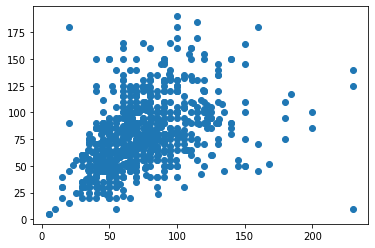

In [ ]:
plt.scatter(x,y)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
pred = LR.predict(xtest)

In [ ]:
pred

array([ 77.15460822,  98.67334   ,  72.37266783,  99.15153404,
        91.50042941, 103.93347444,  58.02684664,  67.59072743,
        91.02223537,  89.10945921,  89.10945921,  79.54557842,
        63.76517512,  72.37266783,  74.76363803,  59.46142876,
        59.9396228 ,  86.71848902,  96.28236981,  65.19975724,
        69.98169763,  65.19975724,  58.02684664,  63.76517512,
        81.93654862,  93.89139961,  58.02684664,  86.71848902,
        72.37266783,  96.28236981,  81.93654862,  81.93654862,
       101.0643102 ,  77.15460822, 103.4552804 ,  67.59072743,
        74.76363803, 110.62819099,  66.63433935,  93.89139961,
        80.5019665 , 108.2372208 ,  62.80878704, 115.41013139,
        79.54557842, 105.8462506 ,  65.19975724,  74.28544399,
        55.63587644,  80.5019665 ,  72.85086187,  65.19975724,
        77.15460822,  77.15460822,  62.80878704,  79.54557842,
        60.41781684,  80.02377246, 120.19207178,  74.76363803,
        80.98016054,  81.93654862,  75.72002611,  75.72

In [ ]:
#absolute error
error = ytest - pred

In [ ]:
error

783    -11.154608
759      6.326660
338      2.627332
485    -10.151534
168     -9.500429
          ...    
429    126.755094
87     -54.755953
560    -10.199757
742      8.670944
577    -29.327519
Name: Attack, Length: 240, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_absolute_error(ytest,pred)

23.83819683512954

In [ ]:
MSE = mean_squared_error(ytest, pred)

In [ ]:
MSE

961.3448179316613

In [ ]:
import math

In [ ]:
RMSE = math.sqrt(MSE)

In [ ]:
RMSE

31.005561080742616